In [51]:
import seaborn as sns;
import pandas as pd;
import matplotlib.pyplot as plt
from plotnine import *
import plotnine as p9
import math
import numpy as np

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

def rela_error(x,y):
            x=x;
            y=y;
            z=abs(x-y)/(x+0.01);
            #print(x)
            #print(y)
            #print(np.around(z,2))
            #print(np.mean(z))
            return np.mean(z);
ground_truth=pd.read_csv('invitro/invitro_groundtruth.csv')
computed_prop1=pd.DataFrame();
computed_prop1['True Proportion']=ground_truth['major']
computed_prop1['Type']=['Major Strain'] *len(ground_truth['major'])
computed_prop1['Method']=['Demixer ($RE=0.27$)'] *len(ground_truth['major'])

list3=np.array(ground_truth['major'].values)
list4=np.array(ground_truth['minor'].values)
#ggplot(computed_prop,aes(x='True Proportion',y='Computed proportion', fill = 'Type'))+ggtitle('Invitro Dataset')+geom_point(size=3)+facet_grid('.~Type',scales = "free", space = "free")+geom_smooth(method = "lm")+ p9.theme(subplots_adjust={'wspace':0.10})+p9.theme(figure_size=(11, 5))
#ggsave(plot=g, filename='NMF_prior.png', dpi=1000)

In [53]:
import pandas as pd
import numpy as np;

#new_theta=pd.read_csv("../scripts/finaloutput/invitro_reset/final_proportion.csv")
for k in range(3,4):
    new_theta=pd.read_csv("../scripts/finaloutput/invitro_new_const"+str(k)+"/final_proportion.csv")
    final_max1=np.zeros(len(new_theta))
    final_max2=np.zeros(len(new_theta))

    for i in range(0,len(new_theta)):
        final_max1[i]=max(new_theta.iloc[i,:])
        final_max2[i]=min(new_theta.iloc[i,:])
    computed_prop1['Computed proportion']=final_max1
    computed_prop2=pd.DataFrame();
    computed_prop2['True Proportion']=ground_truth['minor']
    computed_prop2['Type']=['Minor Strain'] *len(ground_truth['major'])
    computed_prop2['Method']=['Demixer ($RE=0.27$)'] *len(ground_truth['major'])
    computed_prop2['Computed proportion']=final_max2
    frames = [computed_prop1, computed_prop2]
    computed_prop=pd.concat(frames)
    #print(k,(rmse(np.array(final_max1),list3)+rmse(np.array(final_max2),list4))/2)

    print(k,(rela_error(list3,np.array(final_max1))+rela_error(list4,np.array(final_max2)))/2)


3 0.2728995304071448


In [516]:
rela_error(list4,np.array(final_max2))

0.7580543336591724

In [4]:
computed_prop

,True Proportion,Type,Method,Computed proportion
0,0.90,Major Strain,Demixer,0.89
1,0.95,Major Strain,Demixer,0.95
2,1.00,Major Strain,Demixer,1.00
3,0.70,Major Strain,Demixer,0.70
4,1.00,Major Strain,Demixer,1.00
...,...,...,...,...
43,0.30,Minor Strain,Demixer,0.30
44,0.05,Minor Strain,Demixer,0.04
45,0.10,Minor Strain,Demixer,0.11
46,0.05,Minor Strain,Demixer,0.04


In [13]:
#Computation of error for QuantTB
invitro_quanttb=pd.read_csv('invitro/invitro_quanttb.csv')
list1=[];
list2=[];
invitro_quanttb['lineage3'] = invitro_quanttb['lineage3'].fillna('')
invitro_quanttb['prop3'] = invitro_quanttb['prop3'].fillna(0)
invitro_quanttb['lineage2'] = invitro_quanttb['lineage2'].fillna('')
invitro_quanttb['prop2'] = invitro_quanttb['prop2'].fillna(0)

for i in range(0,len(invitro_quanttb)):
    
    
    if(invitro_quanttb.iloc[i,5]==""):
                list1.append(max(invitro_quanttb.iloc[i,2],invitro_quanttb.iloc[i,4]))
                list2.append(min(invitro_quanttb.iloc[i,2],invitro_quanttb.iloc[i,4]))
    
    else:
        if(invitro_quanttb.iloc[i,1]==invitro_quanttb.iloc[i,3]):
            list1.append(max(invitro_quanttb.iloc[i,2]+invitro_quanttb.iloc[i,4],invitro_quanttb.iloc[i,6]))
            list2.append(min(invitro_quanttb.iloc[i,2]+invitro_quanttb.iloc[i,4],invitro_quanttb.iloc[i,6]))
        elif(invitro_quanttb.iloc[i,1]==invitro_quanttb.iloc[i,5]):
            list1.append(max(invitro_quanttb.iloc[i,2]+invitro_quanttb.iloc[i,6],invitro_quanttb.iloc[i,4]))
            list2.append(min(invitro_quanttb.iloc[i,2]+invitro_quanttb.iloc[i,6],invitro_quanttb.iloc[i,4]))
        else:
            list1.append(max(invitro_quanttb.iloc[i,2],invitro_quanttb.iloc[i,4],invitro_quanttb.iloc[i,6]))
            list2.append(min(invitro_quanttb.iloc[i,2],invitro_quanttb.iloc[i,4],invitro_quanttb.iloc[i,6]))
computed_prop1=pd.DataFrame();
computed_prop1['True Proportion']=ground_truth['major']
computed_prop1['Type']=['Major Strain'] *len(ground_truth['major'])
computed_prop1['Method']=['QuantTB ($RE=2.46$)'] *len(ground_truth['major'])
computed_prop1['Computed proportion']=list1
computed_prop2=pd.DataFrame();
computed_prop2['True Proportion']=ground_truth['minor']
computed_prop2['Type']=['Minor Strain'] *len(ground_truth['major'])
computed_prop2['Method']=['QuantTB ($RE=2.46$)'] *len(ground_truth['major'])
computed_prop2['Computed proportion']=list2
frames = [computed_prop,computed_prop1, computed_prop2]
computed_prop_quanttb=pd.concat(frames)

print((rela_error(list3,np.array(list1))+rela_error(list4,np.array(list2)))/2)

2.463122914430545


In [14]:
#Computation of error for Splitstrain
import math
invitro_split=pd.read_csv('invitro/invitro_splitstrain.csv')
list1=invitro_split['prop1'];
list2=invitro_split['prop2'];

computed_prop1=pd.DataFrame();
computed_prop1['True Proportion']=ground_truth['major']
computed_prop1['Type']=['Major Strain'] *len(ground_truth['major'])
computed_prop1['Method']=['SplitStrains ($RE=0.24$)'] *len(ground_truth['major'])
computed_prop1['Computed proportion']=list1
computed_prop2=pd.DataFrame();
computed_prop2['True Proportion']=ground_truth['minor']
computed_prop2['Type']=['Minor Strain'] *len(ground_truth['major'])
computed_prop2['Method']=['SplitStrains ($RE=0.24$)'] *len(ground_truth['major'])
computed_prop2['Computed proportion']=list2
frames = [computed_prop,computed_prop_quanttb,computed_prop1, computed_prop2]
computed_prop_split=pd.concat(frames)

print((rela_error(list3,np.array(list1))+rela_error(list4,np.array(list2)))/2)

0.2391801373820378


In [15]:
#Figure4b
g=ggplot(computed_prop_split,aes(x='True Proportion',y='Computed proportion'))+ggtitle('in vitro dataset')+\
    geom_point(aes(shape='Method',fill='Type'),size=4 )+\
    p9.geom_line(p9.aes(x='True Proportion', y='True Proportion'), color='black')+\
    facet_wrap('~Method')+p9.theme_bw()+\
    p9.theme(figure_size=(10,3))+\
    p9.theme(axis_text_x = element_text(size = 8,color='black'),axis_text_y = element_text(size = 8,color='black'),axis_title_y = element_text(size = 10),axis_title_x = element_text(size = 10),legend_text = element_text(size = 8),legend_title = element_text(size = 10))+\
    p9.themes.theme(legend_key_width=1, legend_key_height=1) +\
    p9.theme(strip_text = element_text(color = "black",size=10))+\
    p9.theme(panel_background=element_rect(fill='purple', alpha=0.01),panel_spacing=.25,)+\
    p9.theme(plot_title=element_text(face='italic'))

ggsave(plot=g, filename='Figure_6d.png', dpi=300)

/data/users/CS18D017/miniconda3/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 10 x 3 in image.
/data/users/CS18D017/miniconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: Figure_6d.png


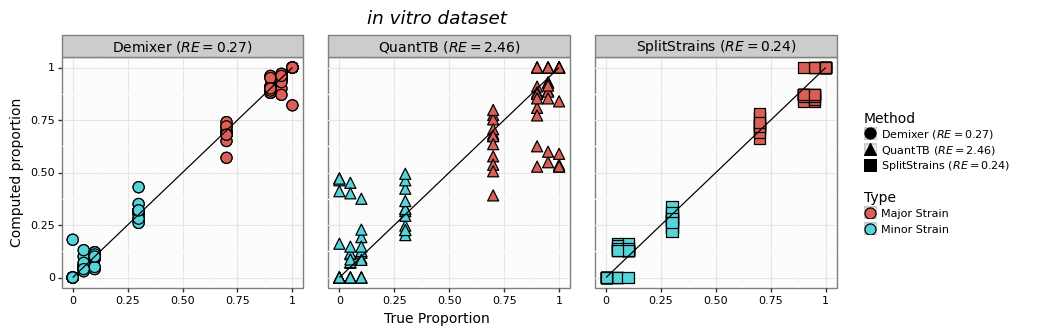

<ggplot: (8743603739636)>

In [16]:
g

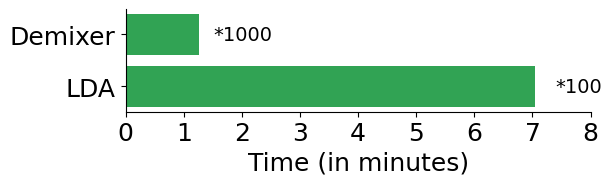

In [8]:
import matplotlib as mpl
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
#invitro

import matplotlib.pyplot as plt
import matplotlib.lines as lines
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
%matplotlib inline
Method=['LDA','Demixer']
Time=[423/60,76/60]
iter=[100,1000]
plt.figure(figsize=(6,2/1.5))
plt.barh(Method,Time, color='#31a354')
plt.xticks(size=18)
plt.yticks(size=18)
plt.xticks(size=18)
plt.xlabel('Time (in minutes)', size=18)
plt.xlim(0,8)
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False) 
    
for i in range(0,len(Method)):
    plt.text(Time[i]+0.75, i, '*'+str(iter[i]), ha = 'center', va='center', size=14)    
#plt.tight_layout()   
#lt.show()
#plt.tight_layout()
plt.savefig('Time_comparison.png',dpi=300, transparent=True, bbox_inches='tight')

In [43]:
lineage=pd.read_csv('invitro/Lineage_comparison.csv')
table=np.zeros((3,2),dtype='int16')
count1=0
count2=0
#print(lineage)
table[0,:]=[12,36]
lin=lineage['Mixinfect (with corrected discrepancies)']
for i in range(0,len(lineage)):
    if('/' in lin[i]):
        if(lin[i]==lineage['Demixer'][i]):
            table[1,1]+=1
        if(lin[i]==lineage['QuantTB'][i]):
            table[2,1]+=1
        count1+=1
    else:
        if(lin[i]==lineage['Demixer'][i]):
            table[1,0]+=1
        if(lin[i]==lineage['QuantTB'][i]):
            table[2,0]+=1
        count2+=1

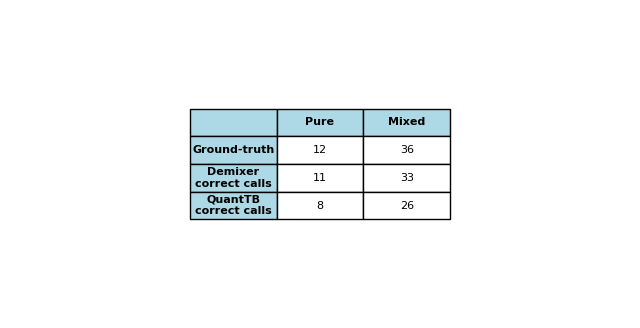

In [61]:
########.....Figure 4d
import matplotlib.pyplot as plt
import pandas as pd


# Create a Pandas DataFrame from the dictionary
df = pd.DataFrame(table,columns=['Pure','Mixed'])


# Add a blank row at the beginning for row IDs
df.insert(0, '','', '')  # Add a new column for row IDs
df[''] = ['Ground-truth','Demixer\ncorrect calls','QuantTB\ncorrect calls']  # Assign row IDs (assuming starting from 1)

# Create a table plot
fig, ax = plt.subplots(figsize=(8, 4))  # Adjust width and height as needed
ax.axis('off') 

# Create a table and add data
table_image = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center', colColours=['#f3f3f3']*len(df.columns))
table_image.auto_set_font_size(False)
table_image.set_fontsize(8)

# Make the first cell in the 'Row ID' column invisible
for (i, j), cell in table_image.get_celld().items():
    if i == 0 and j == 0:
        #cell.set_visible(False)
        cell.set_text_props(weight='bold')
        cell.set_facecolor('#add8e6')
        cell.set_text_props(multialignment='center')

for key, cell in table_image.get_celld().items():
    cell.set_height(0.09)  # Adjust the height as needed
    cell.set_width(0.14) 
    if key[0] == 0 or key[1]==0:  # Assuming the first row contains column labels
        cell.set_text_props(weight='bold')
        cell.set_facecolor('#add8e6')
    cell.set_text_props(multialignment='center')


    
# Save the table as an image
plt.savefig('Figure_4c.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

In [42]:
df

,,Pure,Mixed
0,,11,33
1,,8,26


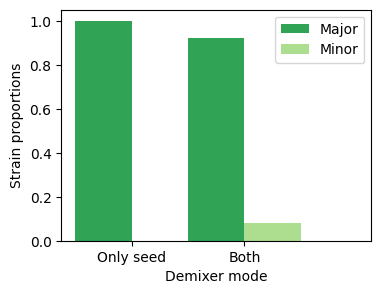

In [24]:
#Figure 4c
# Numbers of pairs of bars you want
N = 2

# Data on X-axis

# Specify the values of blue bars (height)
Major = (1,0.92)
# Specify the values of orange bars (height)
Minor = (0,0.08)

# Position of bars on x-axis
ind = np.array([0,0.05])

# Figure size
plt.figure(figsize=(4,3))

# Width of a bar 
width = 0.025
# Plotting
plt.bar(ind, Major , width, color="#31a354",label='Major')
plt.bar([0.1,0.075], Minor,width, color="#addd8e", label='Minor')

plt.xlabel('Demixer mode',fontsize=10)
plt.ylabel('Strain proportions',fontsize=10)
plt.yticks(fontsize=10)
# xticks()

plt.xticks(ind + width / 2, ('Only seed', 'Both'),size=10)
plt.legend(fontsize=10)
plt.savefig('Figure_6a.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

In [47]:
Cryptic=pd.read_csv('SupplFileD3.csv')

In [48]:
mode=0.05
freq=62
Cryptic_subset = Cryptic[(Cryptic['Demixer'] == "Mix")&(Cryptic['mode'] >= mode) & (Cryptic['long_bar'] >= freq)]

In [49]:
Cryptic_subset.loc[(Cryptic_subset['ETH_BINARY_PHENOTYPE'] =='I'), 'ETH_BINARY_PHENOTYPE'] = 'S'
Cryptic_subset.loc[(Cryptic_subset['EMB_BINARY_PHENOTYPE'] =='I'), 'ETH_BINARY_PHENOTYPE'] = 'S'

In [50]:
#calculate number of isolates wit a phenotpye to each drug and the proportion that are resistant to each drug
drug_names_list=['INH','RIF','EMB','LEV','MXF','AMI','KAN',
                 'BDQ','CFZ','DLM','LZD','ETH','RFB']
t_list=[]
s_list=[]
r_list=[]
i_list=[]
h_list=[]
c=0
for i in drug_names_list:
    t=len(Cryptic_subset[Cryptic_subset[i+'_BINARY_PHENOTYPE'].notna()])
    t_list.append(t)
    s=len(Cryptic_subset[Cryptic_subset[i+'_BINARY_PHENOTYPE']=='S'])
    s_list.append(s)
    r=len(Cryptic_subset[Cryptic_subset[i+'_BINARY_PHENOTYPE']=='R'])
    r_list.append(r)
    hypergeom_dist = hypergeom(sr_df1['PHENOTYPES'].iloc[c], sr_df1['R'].iloc[c], t)
    p_value = hypergeom_dist.sf(r-1)
    h_list.append(p_value)
    c+=1
sr_df=pd.DataFrame(list(zip(drug_names_list,t_list,s_list,r_list,h_list)), 
                 columns=['DRUG','PHENOTYPES','S','R','p-val'])
sr_df['%S']=sr_df['S']/sr_df['PHENOTYPES']*100
sr_df['%R']=sr_df['R']/sr_df['PHENOTYPES']*100
print(sr_df)



# Calculate the probability of observing success_sample or more successes


   DRUG  PHENOTYPES    S    R     p-val         %S         %R
0   INH         434  234  200  0.897397  53.917051  46.082949
1   RIF         431  290  141  0.996315  67.285383  32.714617
2   EMB         433  315   63  0.990010  72.748268  14.549654
3   LEV         433  373   60  0.986824  86.143187  13.856813
4   MXF         435  389   46  0.989735  89.425287  10.574713
5   AMI         430  398   32  0.484325  92.558140   7.441860
6   KAN         435  400   35  0.830416  91.954023   8.045977
7   BDQ         432  428    4  0.551424  99.074074   0.925926
8   CFZ         429  405   24  0.125472  94.405594   5.594406
9   DLM         429  419   10  0.134020  97.668998   2.331002
10  LZD         438  430    8  0.199467  98.173516   1.826484
11  ETH         435  378   57  0.774370  86.896552  13.103448
12  RFB         436  310  126  0.999822  71.100917  28.899083


In [51]:
#calculate number of isolates wit a phenotpye to each drug and the proportion that are resistant to each drug
drug_names_list=['INH','RIF','EMB','LEV','MXF','AMI','KAN',
                 'BDQ','CFZ','DLM','LZD','ETH','RFB']
t_list=[]
s_list=[]
r_list=[]
i_list=[]
for i in drug_names_list:
    t=len(Cryptic[Cryptic[i+'_BINARY_PHENOTYPE'].notna()])
    t_list.append(t)
    s=len(Cryptic[Cryptic[i+'_BINARY_PHENOTYPE']=='S'])
    s_list.append(s)
    r=len(Cryptic[Cryptic[i+'_BINARY_PHENOTYPE']=='R'])
    r_list.append(r)
sr_df1=pd.DataFrame(list(zip(drug_names_list,t_list,s_list,r_list)), 
                 columns=['DRUG','PHENOTYPES','S','R'])
sr_df1['%S']=sr_df1['S']/sr_df1['PHENOTYPES']*100
sr_df1['%R']=sr_df1['R']/sr_df1['PHENOTYPES']*100

print(sr_df1)


   DRUG  PHENOTYPES      S     R         %S         %R
0   INH       12067   6160  5907  51.048314  48.951686
1   RIF       12096   7413  4683  61.284722  38.715278
2   EMB       12155   8335  2261  68.572604  18.601399
3   LEV       12160  10015  2145  82.360197  17.639803
4   MXF       12191  10467  1724  85.858420  14.141580
5   AMI       12069  11187   882  92.692021   7.307979
6   KAN       12127  11007  1120  90.764410   9.235590
7   BDQ       12065  11956   109  99.096560   0.903440
8   CFZ       12046  11521   525  95.641707   4.358293
9   DLM       11925  11739   186  98.440252   1.559748
10  LZD       12186  12030   156  98.719842   1.280158
11  ETH       12129   9431  1727  77.755792  14.238602
12  RFB       12147   7683  4464  63.250185  36.749815


In [52]:
#https://github.com/kerrimalone/Brankin_Malone_2022/blob/main/figures_3_4_analysis_reproduce.ipynb
#calculate number of isolates wit a phenotpye to each drug and the proportion that are resistant to each drug
drug_names_list=['INH','RIF','EMB','LEV','MXF','AMI','KAN',
                 'BDQ','CFZ','DLM','LZD','ETH','RFB']

#isoniazid and rifampcin susceptible but resistant to other drugs
cat1_t=len(Cryptic_subset[(Cryptic_subset['INH_BINARY_PHENOTYPE']!='R')&(Cryptic_subset['RIF_BINARY_PHENOTYPE']!='R')
           & ((Cryptic_subset['EMB_BINARY_PHENOTYPE']=='R')|(Cryptic_subset['LEV_BINARY_PHENOTYPE']=='R') |
             (Cryptic_subset['MXF_BINARY_PHENOTYPE']=='R')|(Cryptic_subset['AMI_BINARY_PHENOTYPE']=='R') |
              (Cryptic_subset['KAN_BINARY_PHENOTYPE']=='R')|(Cryptic_subset['BDQ_BINARY_PHENOTYPE']=='R') |
              (Cryptic_subset['CFZ_BINARY_PHENOTYPE']=='R')|(Cryptic_subset['DLM_BINARY_PHENOTYPE']=='R') |
              (Cryptic_subset['LZD_BINARY_PHENOTYPE']=='R')|(Cryptic_subset['ETH_BINARY_PHENOTYPE']=='R') |
              (Cryptic_subset['RFB_BINARY_PHENOTYPE']=='R')
             )])   
#INH resistant and RIF susceptible
cat2_t=len(Cryptic_subset[(Cryptic_subset['INH_BINARY_PHENOTYPE']=='R')&(Cryptic_subset['RIF_BINARY_PHENOTYPE']!='R')])
#RR/MDR
cat3_t=len(Cryptic_subset[((Cryptic_subset['INH_BINARY_PHENOTYPE']!='R')&(Cryptic_subset['RIF_BINARY_PHENOTYPE']=='R'))|
                         ((Cryptic_subset['INH_BINARY_PHENOTYPE']=='R')&(Cryptic_subset['RIF_BINARY_PHENOTYPE']=='R'))])

#pre-XDR
#RR/MDR + fluoroquinolone resistance
cat4_t=len(Cryptic_subset[(((Cryptic_subset['INH_BINARY_PHENOTYPE']!='R')&(Cryptic_subset['RIF_BINARY_PHENOTYPE']=='R'))|
                         ((Cryptic_subset['INH_BINARY_PHENOTYPE']=='R')&(Cryptic_subset['RIF_BINARY_PHENOTYPE']=='R')) &
                         ((Cryptic_subset['MXF_BINARY_PHENOTYPE']=='R')|(Cryptic_subset['LEV_BINARY_PHENOTYPE']=='R')))])

#XDR (RR/MDR + fluoroquinolone resistance + resistance to a group A agent: bedaquiline or linezolid)
cat5_t= len(Cryptic_subset[(((Cryptic_subset['INH_BINARY_PHENOTYPE']!='R')&(Cryptic_subset['RIF_BINARY_PHENOTYPE']=='R'))|
                         ((Cryptic_subset['INH_BINARY_PHENOTYPE']=='R')&(Cryptic_subset['RIF_BINARY_PHENOTYPE']=='R')) &
                         ((Cryptic_subset['MXF_BINARY_PHENOTYPE']=='R')|(Cryptic_subset['LEV_BINARY_PHENOTYPE']=='R')) &
                         ((Cryptic_subset['BDQ_BINARY_PHENOTYPE']=='R')|(Cryptic_subset['LZD_BINARY_PHENOTYPE']=='R')))])
                          
                          


#sr_df=pd.DataFrame(list(zip(drug_names_list,t_list,s_list,r_list)), 
#columns=['DRUG','PHENOTYPES','S','R'])
#sr_df['%S']=sr_df['S']/sr_df['PHENOTYPES']*100
#sr_df['%R']=sr_df['R']/sr_df['PHENOTYPES']*100

#print(sr_df)

In [53]:
sub=Cryptic_subset[(((Cryptic_subset['INH_BINARY_PHENOTYPE']!='R')&(Cryptic_subset['RIF_BINARY_PHENOTYPE']=='R'))|
                         ((Cryptic_subset['INH_BINARY_PHENOTYPE']=='R')&(Cryptic_subset['RIF_BINARY_PHENOTYPE']=='R')) &
                         ((Cryptic_subset['MXF_BINARY_PHENOTYPE']=='R')|(Cryptic_subset['LEV_BINARY_PHENOTYPE']=='R')) &
                         ((Cryptic_subset['BDQ_BINARY_PHENOTYPE']=='R')|(Cryptic_subset['LZD_BINARY_PHENOTYPE']=='R')))]
                          
                          


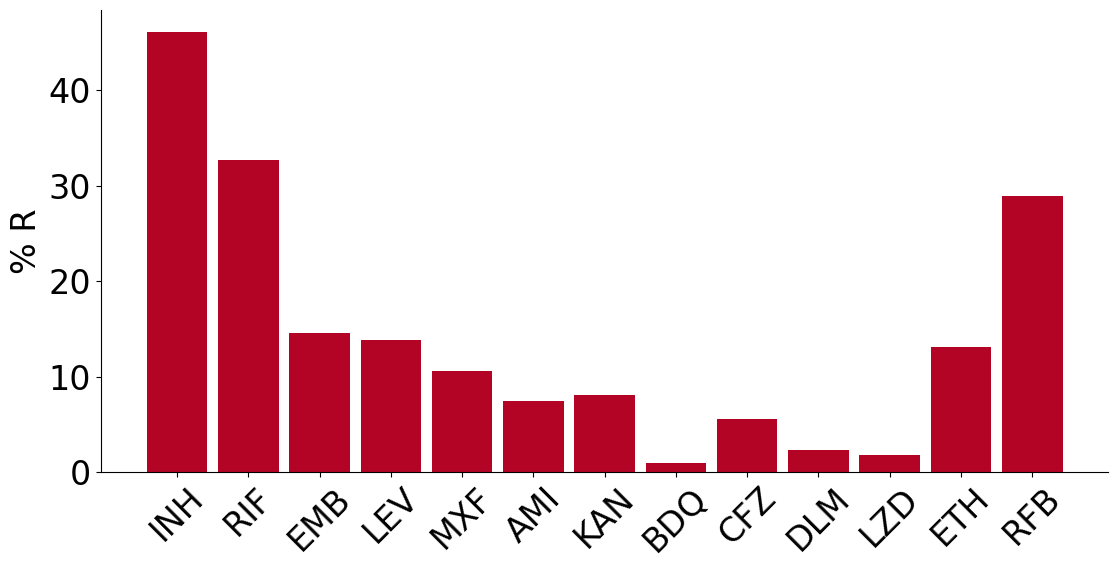

In [54]:
#https://github.com/kerrimalone/Brankin_Malone_2022/blob/main/figures_3_4_analysis_reproduce.ipynb
#create graph
SMALL_SIZE = 14
MEDIUM_SIZE = 24
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

plt.figure(figsize=(len(drug_names_list),6))

N = len(drug_names_list)
L1 = sr_df['%R']



ind = np.arange(N)    
width = 0.85       

p1 = plt.bar(ind, L1, width, color= '#b40426')




plt.ylabel('% R')
plt.title('')
plt.xticks(ind, (drug_names_list), rotation=45)


for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False) 


plt.savefig('%R_per_drug.png', dpi=300, transparent=True, bbox_inches='tight')

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pandas as pd
warnings.filterwarnings("ignore") 
#Sup2=pd.read_csv('SupplFileD2.csv')    #SupplFileD2 - Malawi analysis
Sup2=pd.read_csv('SupplFileD3.csv')    #SupplFileD2 - Cryptic analysis
#Sup2_sub=Sup2[(Sup2['MixInfect']=='Mix') & (Sup2['Demixer']=='Non-Mix')] #uncomment for Malawi dataset
#Sup2_sub1=Sup2[(Sup2['MixInfect']=='Non-Mix') & (Sup2['Demixer']=='Mix')]  #uncomment for Malawi dataset
Sup2_sub=Sup2[(Sup2['Demixer']=='Non-Mix')]   #comment for Malawi dataset
Sup2_sub1=Sup2[Sup2['Demixer']=='Mix']        #comment for Malawi dataset



In [75]:
from scipy.stats import ks_2samp
statistic, p_value = ks_2samp(Sup2_sub.long_bar, Sup2_sub1.long_bar)
print(f'KS Statistic: {statistic}, P-value: {p_value}')

KS Statistic: 0.5119739993157715, P-value: 1.1116756686345252e-09


In [105]:
from scipy.stats import ranksums
stat, p = ranksums(Sup2_sub1.long_bar.values,Sup2_sub.long_bar.values, alternative="greater")

print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=6.238, p=0.000


In [55]:
dump_vals=pd.DataFrame()
dump_vals['Mix']=Sup2_sub1.long_bar
#dump_vals['NonMix']=Sup2_sub.long_bar
dump_vals.to_csv('dumpR1.csv',index=False)

In [56]:
dump_vals


,Mix
11,96
19,112
22,91
24,89
27,527
...,...
12226,67
12234,53
12255,95
12263,65


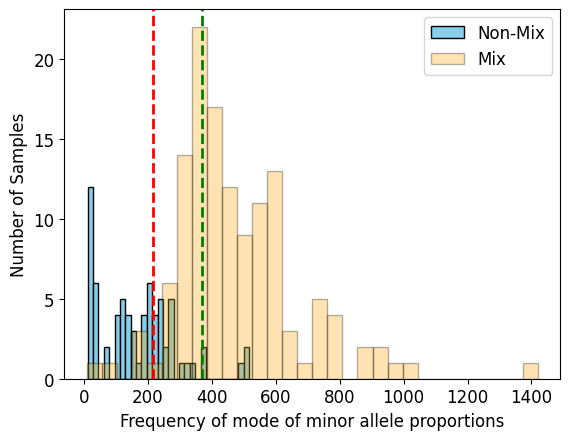

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters

# Example data
#data1 = np.random.randn(1000)
#data2 = np.random.randn(1000) + 1
data1=Sup2_sub.long_bar.values
data2=Sup2_sub1.long_bar.values


# Plot histograms
plt.hist(data1, bins=30, density=False, alpha=1, color='skyblue', edgecolor='black', label='Non-Mix')
plt.hist(data2, bins=30, density=False, alpha=0.3, color='orange', edgecolor='black', label='Mix')
plt.axvline(x=218, color='red', linestyle='--', linewidth=2)
plt.axvline(x=371, color='green', linestyle='--', linewidth=2)

plt.xlabel('Frequency of mode of minor allele proportions',size=12)
plt.ylabel('Number of Samples',size=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)






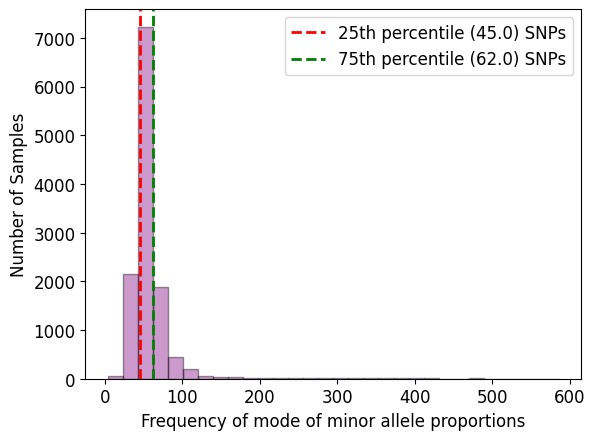

Threshold 1: 62.0
Threshold 2: 64.0
Threshold 2: 68.0
Threshold 2: 76.0
Threshold 2: 95.0


In [7]:
data1=Sup2.long_bar.values
hist, bins, _ = plt.hist(data1, bins=30, density=False, alpha=0.4, color='purple', edgecolor='black')

# Calculate thresholds based on percentiles

percentiles = [25, 75]
col=['red','green']
thresholds = np.percentile(data1, percentiles)
thres=[25,75]
# Draw vertical lines at the thresholds
count=0
for threshold in thresholds:
    plt.axvline(x=threshold, color=col[count], linestyle='--', linewidth=2,label=str(thres[count])+"th percentile ("+str(threshold)+") SNPs")
    count+=1

# Add labels and legend
plt.xlabel('Frequency of mode of minor allele proportions',size=12)
plt.ylabel('Number of Samples',size=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Show the plot
plt.show()

# Display the thresholds
thresholds = np.percentile(data1, [75,80,85,90,95])
print(f'Threshold 1: {thresholds[0]}')
print(f'Threshold 2: {thresholds[1]}')
print(f'Threshold 2: {thresholds[2]}')
print(f'Threshold 2: {thresholds[3]}')
print(f'Threshold 2: {thresholds[4]}')

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 
#Sup2=pd.read_csv('Supp2_new.csv')
Sup2=pd.read_csv('SupplFileD3.csv')

data1=Sup2.long_bar.values
#hist, bins, _ = plt.hist(data1, bins=30, density=False, alpha=0.4, color='purple', edgecolor='black')

# Calculate thresholds based on percentiles

percentiles = [25, 95]
col=['red','green']
thresholds = np.percentile(data1, percentiles)
print(thresholds)

[45. 95.]


In [22]:
from scipy.stats import hypergeom

total = 12287
drug_resistant = 6813
thresholds=[62,64,68,76,95]
mode=0.05
mixed=np.zeros((10,2))
j=0
p_val=[]
def hyper_geom(mixed, mix_drug_res ):  #hypergeom test
    hypergeom_dist = hypergeom(total, drug_resistant, mixed)
    p_value = hypergeom_dist.sf(mix_drug_res-1)
    return p_value
for i in thresholds:
    mixed[j,0]=len(Sup2[(Sup2['long_bar']>i) & (Sup2['Demixer']=="Mix")])
    mixed[j,1]=len(Sup2[(Sup2['long_bar']>i) & (Sup2['Demixer']=="Mix") & (Sup2['Total_resistant']>0)])
    p_val.append(np.around(hyper_geom(mixed[j,0], mixed[j,1]),4))
    print(f"P-value: {p_val[-1]:.4f}")
    j+=1
    mixed[j,0]=len(Sup2[(Sup2['long_bar']>i) & (Sup2['Demixer']=="Mix") & (Sup2['mode']>0.05)])
    mixed[j,1]=len(Sup2[(Sup2['long_bar']>i) & (Sup2['Demixer']=="Mix") & (Sup2['mode']>0.05) & (Sup2['Total_resistant']>0)])
    p_val.append(np.around(hyper_geom(mixed[j,0], mixed[j,1]),4))
    j+=1
                   
    

P-value: 0.8061
P-value: 0.7446
P-value: 0.5797
P-value: 0.5543
P-value: 0.1005


In [23]:
Cryptic_t=pd.DataFrame(mixed)
Cryptic_t['p_val']=p_val
Cryptic_t.to_csv('Cryptic_t.csv',index=False)

In [24]:
Cryptic_t

,0,1,p_val
0,558.0,300.0,0.8061
1,385.0,225.0,0.1253
2,519.0,281.0,0.7446
3,355.0,210.0,0.0848
4,470.0,259.0,0.5797
5,320.0,194.0,0.0331
6,391.0,216.0,0.5543
7,269.0,166.0,0.0209
8,311.0,184.0,0.1005
9,243.0,153.0,0.0099
